# Ancien TME 8 : MCMC et échantillonnage

Juste un essai pour la culture.  
http://mapsi.lip6.fr/pmwiki.php?n=Cours.TME9

<IPython.core.display.Javascript object>


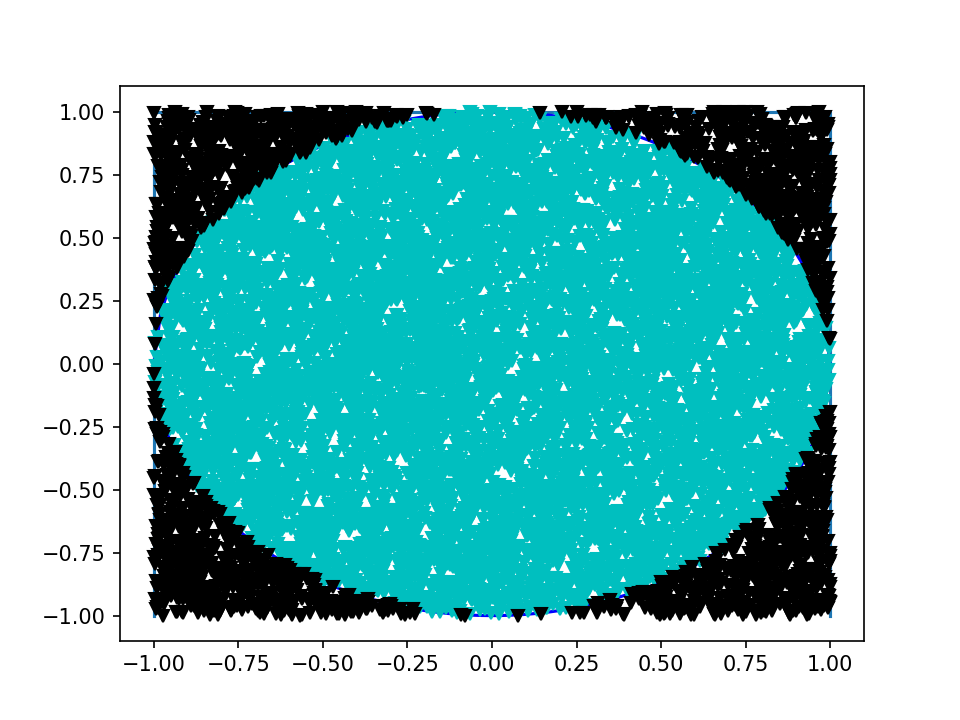

Estimation de pi:  3.1564


In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

def tirage(m):
    tir = np.array(np.random.rand(2))
    return tir*2*m-m

def monteCarlo(N):
    tirs = np.array([tirage(1) for i in range(N)])    
    X = tirs[:,0] # récupérer tous les X
    Y = tirs[:,1] # récupérer tous les Y
    estim = 4*np.sum(np.where((X**2+Y**2)<=1,1,0))/ N
    # ceux qui sont dans le cercle de rayon 1
    return (estim,X,Y)

plt.figure()
# trace le carré
plt.plot([-1, -1, 1, 1], [-1, 1, 1, -1], '-')
# trace le cercle
x = np.linspace(-1, 1, 100)
y = np.sqrt(1- x*x)
plt.plot(x, y, 'b')
plt.plot(x, -y, 'b')
# estimation par Monte Carlo
mypi, x, y = monteCarlo(int(1e4))
# trace les points dans le cercle et hors du cercle
dist = x*x + y*y
plt.plot(x[dist <=1], y[dist <=1], "cv")
plt.plot(x[dist>1], y[dist>1], "kv")
plt.show()

print("Estimation de pi: ", mypi)

Peut-être mille tirages ne sont-ils pas suffisants pour atteindre un iconique 3.14.

## Metropolis-Hastings

In [7]:
import pickle as pkl

# si vos fichiers sont dans un repertoire "ressources"
with open("./countWar.pkl", 'rb') as f:
    (count,mu,A) = pkl.load(f, encoding='latin1')

with open("./secret.txt", 'r') as f:
    secret = f.read()[0:-1] # -1 pour supprimer le saut de ligne
    
with open("secret2.txt", 'r') as f:
    secret2 = f.read()[0:-1]
    
with open("fichierHash.pkl" , 'rb') as f:
    chars2index = pkl.load(f, encoding='latin1')

La variable count est un dictionnaire : 
pour chaque lettre du roman War and Peace, il fournit son nombre d'occurrences dans le roman.
Le modèle de bigrammes est décrit par les variables mu et A.  
La variable mu est un vecteur qui contient la distribution de probabilité initiale sur les lettres.  
La variable A est une matrice qui donne les probabilités d'une lettre étant donné une autre lettre.  
La variable secret contient le message à décoder.  

In [8]:
def swapF(dic):
    c1 = np.random.choice(list(dic.keys()))
    c2 = np.random.choice(list(dic.keys()))
    newdict = dict(dic)
    newdict[c1] = dic[c2]
    newdict[c2] = dic[c1]
    return newdict

def decrypt(mess,dic):
    read = ""
    for m in mess:
        read+= dic[m]
    return read

In [9]:
tau = {'a' : 'b', 'b' : 'c', 'c' : 'a', 'd' : 'd' }
print(decrypt ( "aabcd", tau ))
print(decrypt ( "dcba", tau ))

bbcad
dacb


In [10]:
chars2index = dict(zip(np.array(list(count.keys())), np.arange(len(count.keys()))))

In [11]:
def logLikelihood(mess, mu, A, chars2index):
    p = np.log(mu[chars2index[mess[0]]])
    for m in range(1,len(mess)):
        p += np.log(A[chars2index[mess[m-1]], chars2index[mess[m]]])
    return p

In [12]:
logLikelihood("abcd", mu, A, chars2index)
logLikelihood("dcba", mu, A, chars2index)

-26.274828997400395

In [13]:
def MetropolisHastings(mess, mu, A, tau, N, chars2index):
    read = mess
    p = logLikelihood(read, mu, A, chars2index)
    for i in range(N):
        retau = swapF(tau)
        reread = decrypt(mess, retau)
        rep = logLikelihood(reread, mu, A, chars2index)
        if rep > p or (np.log(np.random.rand()) <= rep-p):
            tau = retau
            read = reread
            p = rep
    return read, p

In [16]:
def identityTau(count):
    tau = {}
    for k in list(count.keys()):
        tau[k] = k
    return tau

In [17]:
alors = MetropolisHastings(secret2, mu, A, identityTau(count), 30000, chars2index)
print(alors[1],alors[0])

-5567.745860568473 E660/(Q9302=143=420/9:405X9:464)09673V05/950*95/,0EXX1:13V09501381315421Q962Z0Q95/4Q951=2Z05/40Q72504H9=507802=143=42Z09L93)73205/40*X7=42207809396J212093)04354X207305/4034U0*X7=42207805/401354VX951730780(3Y37U3Z0138131546J02Q966Z0 (93515142,0EL93)7313V05/40=73=4*51730780=9(24Z0Q95/4Q951=20244Y2069UZ05/95012Z05/40*X7*4X5J0=7QQ7305709660(3Y37U3Z0138131546J02Q966Z0464Q4352,0G309375/4X087XQ0L(509673V05/4029Q40*95/0780X4864=517305/4075/4X02=143=420/9:40*X7=44)4),0x/430?4U573043(3=1954)05/4069U0780VX9:15J0/40)1)0375029J05/9505/402(307X05/4049X5/0/9)090*X7*4X5J0780955X9=5173;0/40291)05/9509660L7)14208X7Q05/4069XV42505705/402Q9664250/9:405/40*X7*4X5J0780955X9=513V073409375/4XZ05/95012Z0649:13V0921)405/40 (42517307805/40=9(2407805/40Q7:4Q43507805/40L7)142Z0/404H*X4224)05/40*X7*4X5J0=7QQ7305709660L7)14208X7Q05/40138131546J069XV405705/40138131546J02Q966,0K/4029Q40120)7340LJ05/40395(X9602=143=42I0649:13V0921)405/40 (4251730780=9(24Z05/4J0244Y087X069U2,0O1257XJ02593)207305/4029Q

In [87]:
freqKeys = np.array(list(count.keys()))
freqVal  = np.array(list(count.values()))
rankFreq = (-freqVal).argsort()

cles = np.array(list(set(secret2)))
rankSecret = np.argsort(-np.array([secret2.count(c) for c in cles]))
tau_init = dict([(cles[rankSecret[i]], freqKeys[rankFreq[i]]) for i in range(len(rankSecret))])

alors = MetropolisHastings(secret2, mu, A, tau_init, 48000, chars2index)
print(alors[1],alors[0])

-3796.16849813721 Pff nbmor shterhes noue ilouefey ofarg inoi coin! Plltutrg oi trdtrtiestmofs, moinemoiths, ine masi exohi ad shterhes, oworyars ine clahess ad orof.sts ory eriels ar ine rep clahess ad ine triegloitar ad br'rapr, trdtrtief. smoff, "boritites! Pworyartrg ine harhecitar ad hobse, moinemoiths see's fop, inoi ts, ine claceli. hammar ia off br'rapr, trdtrtief. smoff, efemeris! Br orainel dalm wbi ofarg ine some coin ad ledfehitar ine ainel shterhes noue claheeyey! Tner vepiar erbrhtoiey ine fop ad glouti. ne yty rai so. inoi ine sbr al ine eolin noy o claceli. ad oiilohitar- ne soty inoi off waytes dlam ine folgesi ia ine smoffesi noue ine claceli. ad oiilohitrg are orainel, inoi ts, feoutrg ostye ine "besitar ad ine hobse ad ine mauemeri ad ine waytes, ne exclessey ine claceli. hammar ia off waytes dlam ine trdtrtief. folge ia ine trdtrtief. smoff! Ane some ts yare w. ine roiblof shterhesk feoutrg ostye ine "besitar ad hobse, ine. see' dal fops! Itsial. siorys ar ine some

In [18]:
freqKeys = np.array(list(count.keys()))
freqVal  = np.array(list(count.values()))
rankFreq = (-freqVal).argsort()

cles = np.array(list(set(secret2)))
rankSecret = np.argsort(-np.array([secret2.count(c) for c in cles]))
tau_init = dict([(cles[rankSecret[i]], freqKeys[rankFreq[i]]) for i in range(len(rankSecret))])

alors = MetropolisHastings(secret2, mu, A, tau_init, 50000, chars2index)
print(alors[1],alors[0])

# Des erreurs au niveau des caractères rares, 
# comme le N (H) majuscule de Newton, le H (P) de History, le T (") de The.

-3086.359611220995 All human sciences have traveled along that path. Arriving at infinitesimals, mathematics, the most exact of sciences, abandons the process of analysis and enters on the new process of the integration of unknown, infinitely small, Buantities. Abandoning the conception of cause, mathematics seeks law, that is, the property common to all unknown, infinitely small, elements. In another form but along the same path of reflection the other sciences have proceeded. Then Hewton enunciated the law of gravity he did not say that the sun or the earth had a property of attraction' he said that all bodies from the largest to the smallest have the property of attracting one another, that is, leaving aside the Buestion of the cause of the movement of the bodies, he expressed the property common to all bodies from the infinitely large to the infinitely small. "he same is done by the natural sciences! leaving aside the Buestion of cause, they seek for laws. Pistory stands on the sam